# Visualization of Earning based on College Majors

In this project, we will work with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data was released by [American COmmunity Survey](https://www.census.gov/programs-surveys/acs/) and FiveThirtyEight cleaned the dataset and release it on the [github page](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Rows in the dataset represent different majors in college, and they contain infomration on gender diversity, employment rates, median salaries and so on. Here is the description of each column in the data.

|Column Name|Description|
|---|---|
| Rank | Rank by median earnings |
| Major_code | Mojor code |
| Major | Major description |
| Major_category | Category of major |
| Total | Total number of people with major |
| Sample_size | Sample size (unweighted( of full-time |
| Men | Male graduates |
| Women | Female graduates |
| ShareWomen | Womens as share of total |
| Employed | Number employed |
| Median | Median salary of full-time, year-round workers |
| Low_wage_jobs | Number in low-wage service jobs |
| Full_time | Number employed 35 hours or more |
| Part_time | Number employed less than 35 hours |

Our goal is to know:
* Do students in more popular majors make more money?
* How many majors are predominantly male or predominantly female?
* Which category of majors have the most students?

We will work on the data with the help of python pandas library.

## Import python libraries and explore datset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [11]:
# Let take a look at first 5 rows
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [12]:
# Let take a look at last 5 rows
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [34]:
recent_grads.describe()

0      0.018381
1      0.117241
2      0.024096
3      0.050125
4      0.061098
         ...   
168    0.046320
169    0.065112
170    0.149048
171    0.053621
172    0.104946
Name: Unemployment_rate, Length: 172, dtype: float64

## Remove rows with null values


In [17]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()

In [18]:
clean_data_count = recent_grads.shape[0]

In [19]:
print(raw_data_count)
print(clean_data_count)

173
172


There is only one row contained missing values!

# Generate scatter plots to understand the correlations between different columns

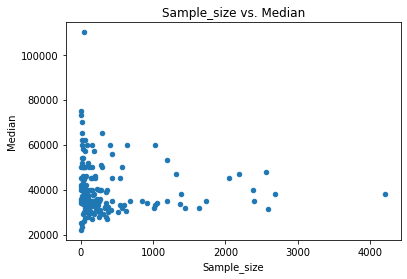

In [47]:
recent_grads.plot(x = 'Sample_size', y = 'Median'
                  , kind = 'scatter'
                  , title = 'Sample_size vs. Median')

No significant relationship between sample_size and median. The data has a high variance near 0 points but quickly diminish as Sample_size becomes higher. We can say there is no clear relationship between the 2 columns.

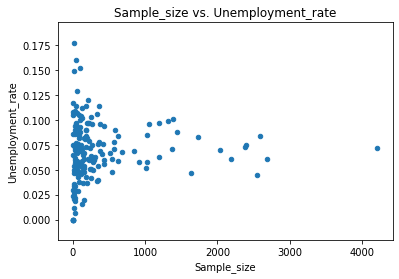

In [48]:
recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate'
                  , kind = 'scatter'
                  , title = 'Sample_size vs. Unemployment_rate')

No significant relationship between sample_size and unemployment rate.

Text(0.5, 1.0, 'Full_time vs. Median')

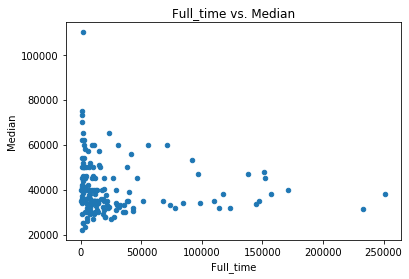

In [49]:
ax = recent_grads.plot(x='Full_time'
                  , y='Median', kind='scatter')
ax.set_title('Full_time vs. Median')

No significant relation between median and number of full-time workers.

Text(0.5, 1.0, 'ShareWomen vs. Unemployment_rate')

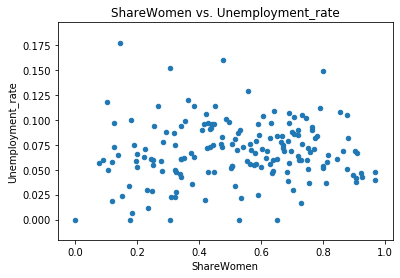

In [51]:
ax = recent_grads.plot(x='ShareWomen'
                  , y='Unemployment_rate', kind='scatter')
ax.set_title('ShareWomen vs. Unemployment_rate')

This scatter plot shows that the variances are equal at all ranges. It can be concluded that either of the two columns don't influence each other on a linear sense.

Text(0.5, 1.0, 'Men vs. Median')

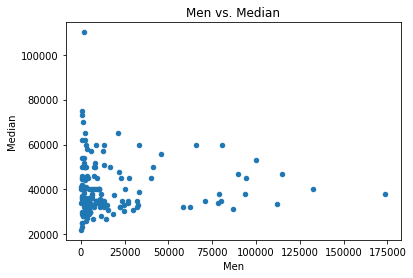

In [52]:
ax = recent_grads.plot(x = 'Men', y = 'Median'
                       , kind = 'scatter') #figsize = (5,5)
ax.set_title('Men vs. Median')

No significant relation found.

Text(0.5, 1.0, 'Women vs. Median')

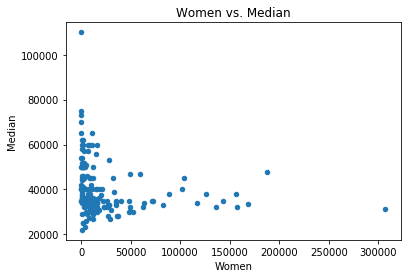

In [56]:
ax = recent_grads.plot(x = 'Women', y = 'Median'
                       , kind = 'scatter') #figsize = (5,5)
ax.set_title('Women vs. Median')

No significant relation found.

Text(0.5, 1.0, 'ShareWomen vs. Median')

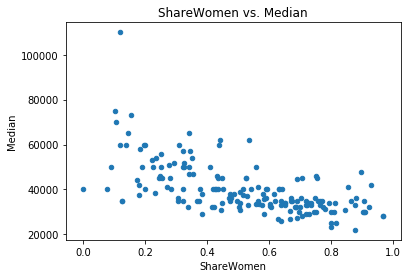

In [46]:
ax = recent_grads.plot(x = 'ShareWomen', y = 'Median'
                       , kind = 'scatter') #figsize = (5,5)
ax.set_title('ShareWomen vs. Median')

No significant relationship found.

# Let's answer back our questions!

### Do students in more popular majors make more money?

Text(0.5, 1.0, 'Total vs. Median')

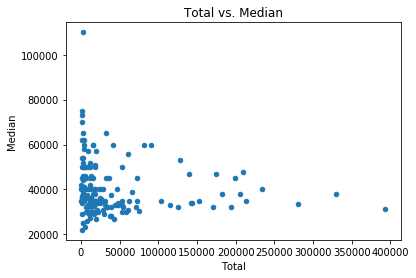

In [54]:
ax = recent_grads.plot(x = 'Total', y = 'Median'
                       , kind = 'scatter') #figsize = (5,5)
ax.set_title('Total vs. Median')

There is no significant relation between the total number of students and the salary. There  is no linear variation between the variables. With a higher median, there is nothing happens to the number of students.

### Do students that majoored in subjects that were majority female make more money?


Text(0.5, 1.0, 'ShareWomen vs. Median')

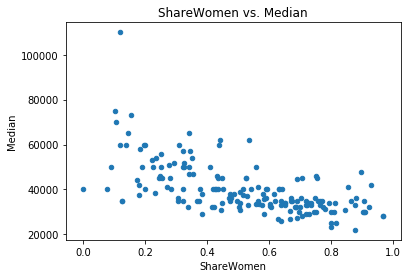

In [58]:
ax = recent_grads.plot(x = 'ShareWomen', y = 'Median'
                       , kind = 'scatter') #figsize = (5,5)
ax.set_title('ShareWomen vs. Median')

There is no clear relationship between the subjects with majority femakes and the meadian salary. With more share women, the median of salary alsways lie within the same range. 

### Is there a link between the number of full-time employees and median salary?

Text(0.5, 1.0, 'Full_time vs. Median')

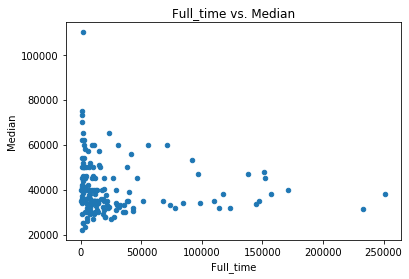

In [43]:
ax = recent_grads.plot(x = 'Full_time', y = 'Median'
                       , kind = 'scatter') #figsize = (5,5)
ax.set_title('Full_time vs. Median')

Still, we see no significant relationship between the median salary and the number of full-time employees.

# We can also explore the distribution of values in a series column with Histogram plot

Text(0.5, 1.0, 'Sample_size')

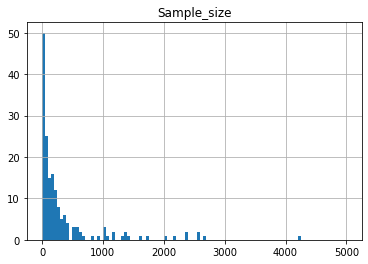

In [134]:
ax = recent_grads['Sample_size'].hist(bins=100, range=(0,5000))
ax.set_title('Sample_size')

#fig = plt.figure(figsize=(5,20))
#ax = fig.add_subplot(4,1,1)


Text(0.5, 1.0, 'Median')

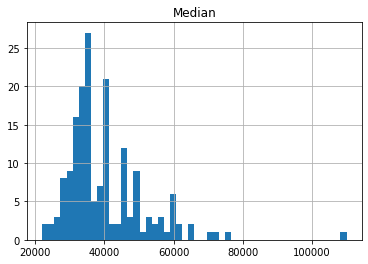

In [86]:
ax = recent_grads['Median'].hist(bins=50)
ax.set_title('Median')

Text(0.5, 1.0, 'Employed')

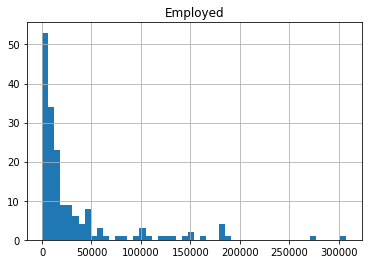

In [77]:
ax = recent_grads['Employed'].hist(bins=50)
ax.set_title('Employed')

Text(0.5, 1.0, 'Full_time')

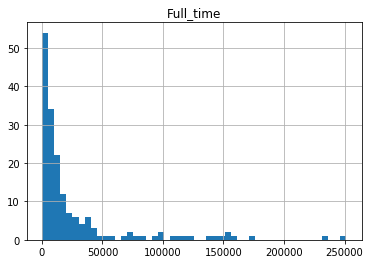

In [81]:
ax = recent_grads['Full_time'].hist(bins=50)
ax.set_title('Full_time')

Text(0.5, 1.0, 'ShareWomen')

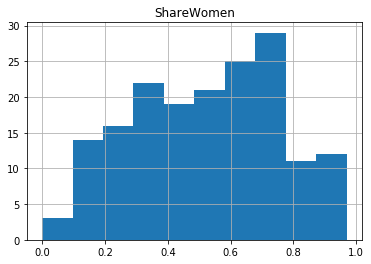

In [97]:
ax = recent_grads['ShareWomen'].hist(bins=10)
ax.set_title('ShareWomen')

Text(0.5, 1.0, 'Unemployment_rate')

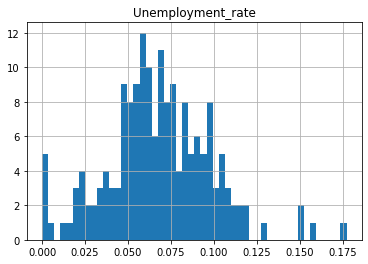

In [83]:
ax = recent_grads['Unemployment_rate'].hist(bins=50)
ax.set_title('Unemployment_rate')

Text(0.5, 1.0, 'Men')

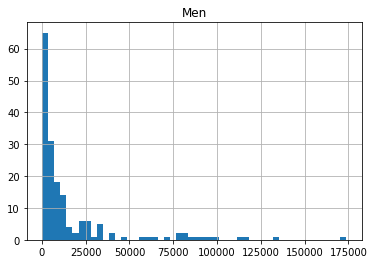

In [84]:
ax = recent_grads['Men'].hist(bins=50)
ax.set_title('Men')

Text(0.5, 1.0, 'Women')

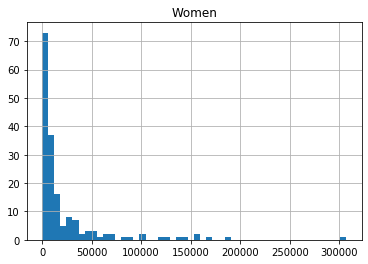

In [85]:
ax = recent_grads['Women'].hist(bins=50)
ax.set_title('Women')

# What is the most common median salary range?

The most common median salary range is in the range of 20,000 to 50,000.

# What percent of majors are predominantly male or women?

There are two possible way to find the percentage.
* 1st way: by referring to histogram:

(-0.0019690000000000003, 0.0484]     1
(0.0484, 0.0969]                     2
(0.0969, 0.145]                      8
(0.145, 0.194]                       6
(0.194, 0.242]                       7
(0.242, 0.291]                       9
(0.291, 0.339]                      10
(0.339, 0.388]                      12
(0.388, 0.436]                       8
(0.436, 0.484]                      11
(0.484, 0.533]                      12
(0.533, 0.581]                       9
(0.581, 0.63]                       11
(0.63, 0.678]                       14
(0.678, 0.727]                      15
(0.727, 0.775]                      14
(0.775, 0.824]                       8
(0.824, 0.872]                       3
(0.872, 0.921]                       8
(0.921, 0.969]                       4
Name: ShareWomen, dtype: int64
86
0.5
74
0.43023255813953487


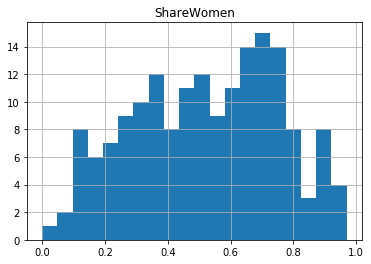

In [122]:
ax = recent_grads['ShareWomen'].hist(bins=20)
ax.set_title('ShareWomen')

# To understand the histogram.
sorted_sharewomen = recent_grads['ShareWomen'].value_counts(bins = 20).sort_index()
print(sorted_sharewomen)
number_major_men = sum(sorted_sharewomen[:10])
number_major_sharewomen = sum(sorted_sharewomen[11:])
print(number_major_sharewomen)
print(number_major_sharewomen / (recent_grads.shape[0]))
print(number_major_men)
print(number_major_men / (recent_grads.shape[0]))


We found that there are 86 majors (50%) dominated by women and 74 courses dominated by men (43%). Remaining majors are having more or less even distribution for the number of men and women.
* 2 Boolean indexing:

In [127]:
Num_major_woman = len(recent_grads.loc[recent_grads['ShareWomen'] > 0.5, 'Major'])

In [128]:
Num_major_man = len(recent_grads.loc[recent_grads['ShareWomen'] < 0.5, 'Major'])

In [129]:
Percent_woman = Num_major_woman / recent_grads.shape[0]
Percent_man = Num_major_man / recent_grads.shape[0]
print(Percent_woman)
print(Percent_man)

0.5581395348837209
0.4418604651162791


By this way, we found that 55% of majors are dominated by women and 44% are dominaed by men.

# Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124004a50>,
      dtype=object)

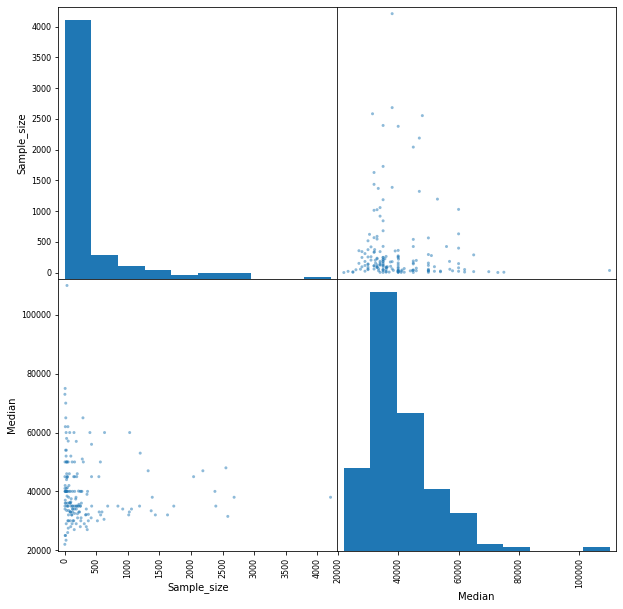

In [140]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121feb3d0>,
      dtype=object)

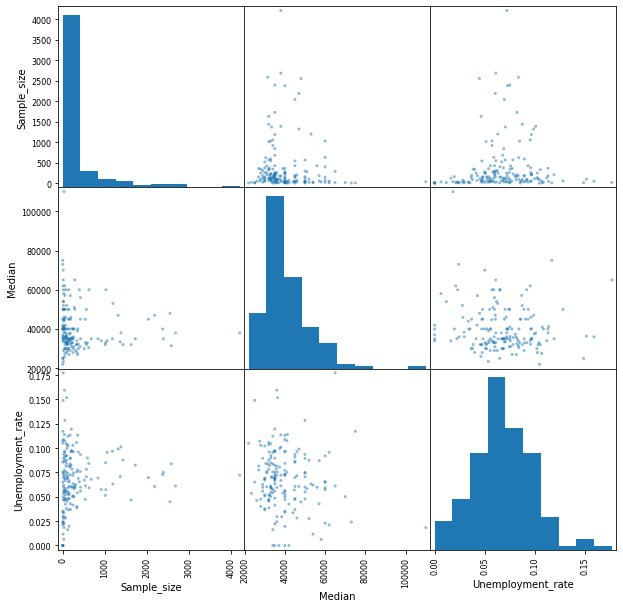

In [141]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']]
               ,figsize = (10,10))

# Bar chart

First, select what to display

Text(0.5, 1.0, 'Last ten')

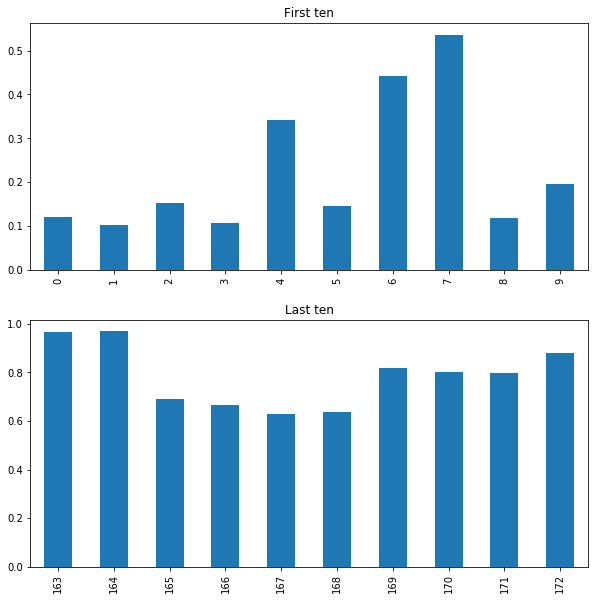

In [169]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
recent_grads[:10]['ShareWomen'].plot(kind = 'bar', ax = ax1)
ax1.set_title('First ten')
recent_grads[-10:]['ShareWomen'].plot(kind = 'bar', ax = ax2)
ax2.set_title('Last ten')
#x parameter to specify the labels and the y parameter to specify the data for the bars
#recent_grads[:10].plot.bar(x = 'Major', y = 'Women')


Text(0.5, 1.0, 'Last ten')

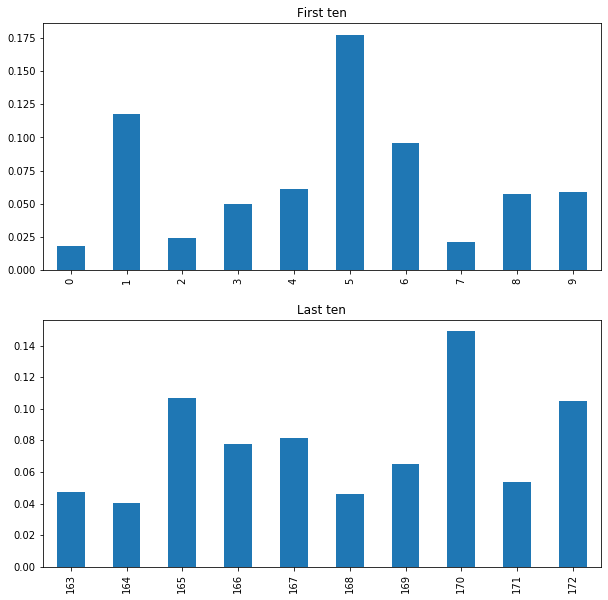

In [172]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
recent_grads[:10]['Unemployment_rate'].plot(kind = 'bar', ax = ax1)
ax1.set_title('First ten')
recent_grads[-10:]['Unemployment_rate'].plot(kind = 'bar', ax = ax2)
ax2.set_title('Last ten')

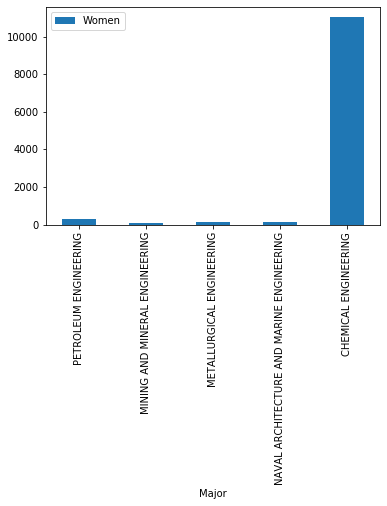

In [147]:
#x parameter to specify the labels and the y parameter to specify the data for the bars
recent_grads[:5].plot.bar(x = 'Major', y = 'Women')

We encourage you to keep exploring these other visualizations on your own. Here are some ideas:

* Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
* Use a box plot to explore the distributions of median salaries and unemployment rate.
* Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.